# Classification of Iris Species using Support Vector Machine (SVM)

**Name:** Md Farhan Ishmam

**ID:** 180041120

**Course Code and Name:** CSE4739 Data Mining

**Submission Date:** 19-11-2022


# 1 Knowing the Dataset
The first step of any data analysis task is getting to know our dataset. We are given datasets in different forms - some might be thoroughly preprocessed and cleaned, some might need manual filling of missing values, and so on. Our Iris dataset that has been collected from the official website of the Iris Dataset: https://archive.ics.uci.edu/ml/datasets/iris, has already been cleaned and a description has been provided as well. This makes our job in working with the dataset much easier. Hence, in this section, we will not quantify the missing values or clean the dataset any further. We will simply see the summary statistics and visualize our dataset.

## 1.1 Importing the Libraries

In [ ]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2 Loading the Dataset

After importing the libraries, we collect your dataset and other required files. We download two files - iris.names and iris.data. The iris.names file contains the description of our dataset where we can find the headers for the columns. The iris.data file is our raw dataset with the values only. The dataset is loaded to a Pandas Dataframe using the pandas built-in `read_csv()` function. While loading the dataset, we pass the column names as an argument. We have a look at the first five rows of our dataset using the `head()` function.

In [ ]:
#The names are collected from the iris.names file of the official iris dataset
names = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Class']
#The iris.data file is collected from the official iris dataset 
df = pd.read_csv("iris.data", names = names)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1.3 Summary Statistics

In the description of Iris dataset, it has been mentioned that our dataset is been cleaned and there are no missing values. So, no further preprocessing is required except scaling. We first have a look at the number of rows and columns in our dataset by accessing the `shape` attribute of our Pandas Dataframe. We can see our dataset is relatively small with 150 rows and 5 columns which have been labelled before. 

In [ ]:
print('The data frame has', df.shape[0], 'rows and', df.shape[1], 'columnns')

The data frame has 150 rows and 5 columnns


To get a better idea of our dataset, we can check its summary statistics by using Pandas built-in function `describe()`. The summary statistics give us a numerical estimation of all the important statistical measures. The class attribute of our dataset is categorical and hence, will not be shown in the summary statistics.

In [ ]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1.4 Data Visualization

Using summary statistics give us a numerical view on our dataset. But humans are better at retaining information visually. We will use some simple boxplots to visualize our dataset.

Using Seaborn's built-in `boxplot()` and `stripplot()` function, we can easily plot our boxplots and the datapoints in the same visualization.

### 1.4.1 Sepal Length vs Class

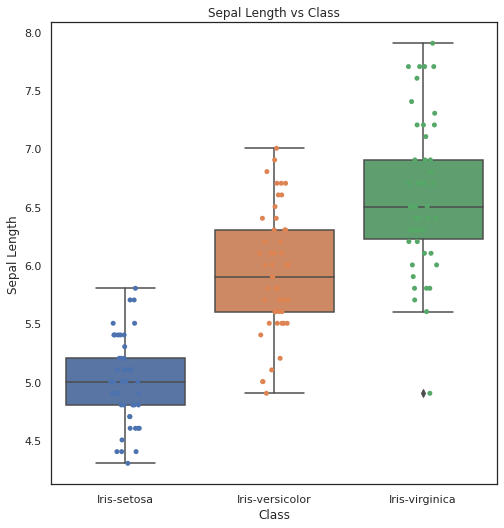

In [ ]:
sns.set(rc={'figure.figsize':(8,8.5)})
sns.set(style="white", color_codes=True)
ax = sns.boxplot(x="Class", y="Sepal Length", data=df).set(title='Sepal Length vs Class')
ax = sns.stripplot(x="Class", y="Sepal Length", data=df, jitter=True, edgecolor="gray")

Iris-setosa has the least median sepal length followed by Iris-versicolor and Iris-virginica. However, Iris-virginica has an outlier with a sepal length of around 5 cm which falls way behind the median sepal length of 6.5 cm.

### 1.4.2 Sepal Width vs Class

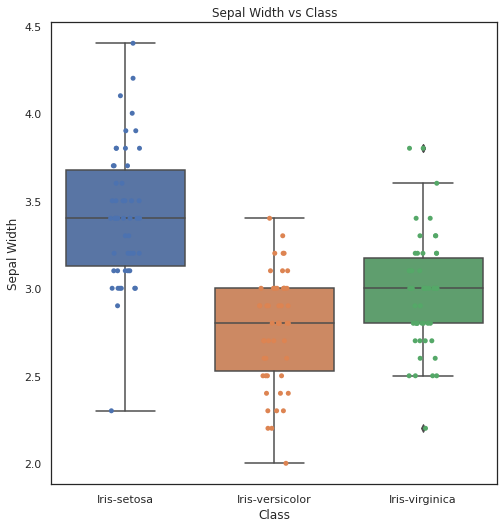

In [ ]:
ax = sns.boxplot(x="Class", y="Sepal Width", data=df).set(title='Sepal Width vs Class')
ax = sns.stripplot(x="Class", y="Sepal Width", data=df, jitter=True, edgecolor="gray")

The sepal width shows a different distribution with Iris-setosa having the highest median width but also having a wider range of values. Iris-virginica has a couple of outliers at the top and bottom.

### 1.4.3 Petal Length vs Class

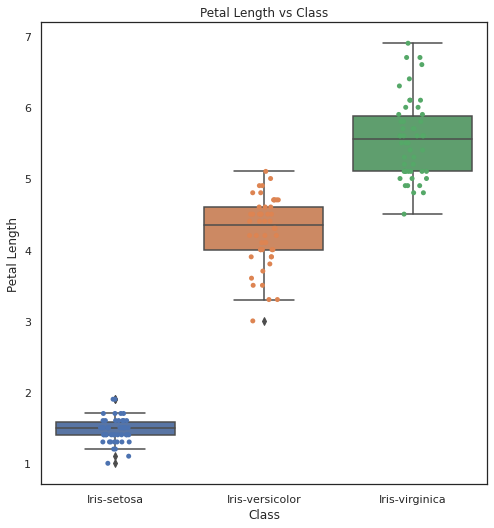

In [ ]:
ax = sns.boxplot(x="Class", y="Petal Length", data=df).set(title='Petal Length vs Class')
ax = sns.stripplot(x="Class", y="Petal Length", data=df, jitter=True, edgecolor="gray")

Iris-setosa has a very narrow range of petal length and also has the least median petal length. The median petal length of the other two classes are considerably higher. Iris-setosa and Iris-versicolor has some outliers at the bottom.

### 1.4.4 Petal Width vs Class

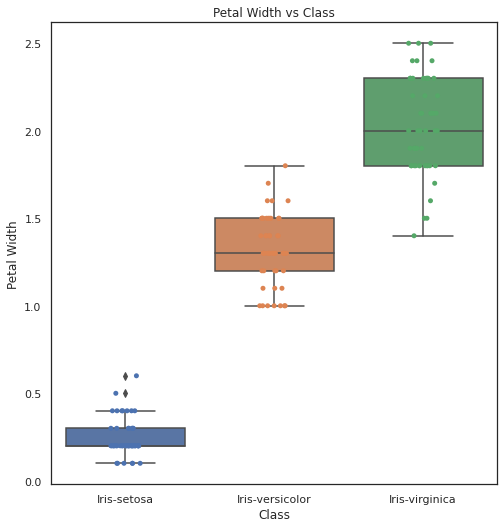

In [ ]:
ax = sns.boxplot(x="Class", y="Petal Width", data=df).set(title='Petal Width vs Class')
ax = sns.stripplot(x="Class", y="Petal Width", data=df, jitter=True, edgecolor="gray")

Similar to the petal length, the petal width of Iris-setosa has a narrow range and also has the least median length. However, it has ourliers at the top. The other two classes have considerably higher median petal width with no outliars.

# 2 Data Preprocessing

Before feeding our dataset to our model, we need to transform it into an appropriate form. Data Preprocessing involves - Data Cleaning, Data Integration, Data Reduction, and Data Transformation. As mentioned earliar, our dataset has already been cleaned and is from a single source. So, the first two steps can be skipped. We would first perform correlation analysis on our dataset, and then scale the dataset. Apart from that, we need to map categorical values to numerical ones, extract features and target class from our dataset, and make train-test splits.

## 2.1 Mapping Categorical to Numerical Values
Our model can not interpret categorical values. So, we feed these values to our model by simply mapping them to a numerical value. Our `class` attirbute is a categorical attribute and needs to be mapped. Using the `unique()` command, we can find the list of unique values for any attribute.

In [ ]:
df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We perform the mapping:
*   Iris-setosa : 0
*   Iris-versicolor : 1
*   Iris-virginica : 2

In [ ]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor':1, 'Iris-virginica':2}
df['Class'] = df['Class'].map(mapping)

The Pandas built-in `map()` function can be used to perform our mapping. Afterward, we check the unique values and find that they are 0, 1, and 2.

In [ ]:
df['Class'].unique()

array([0, 1, 2])

## 2.2 Correlation Analysis
Before extracting our features from the dataset, let's perform correlation analysis and remove all the redundant and derived columns from our dataset. To check the correlation between the columns we can use a heatmap from Seaborn.

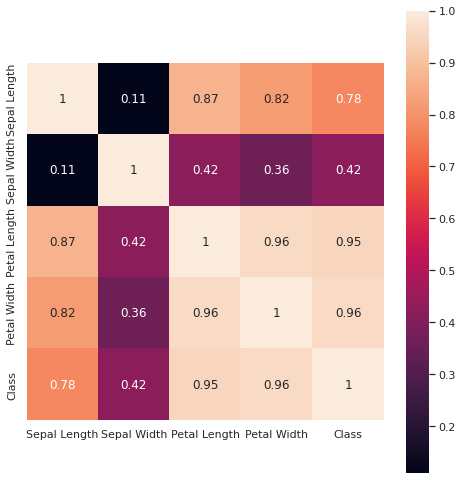

In [ ]:
sns.heatmap(abs(round(df.corr(),2)), annot = True, square=True)
plt.show()

Petal Width and Petal Length has very high correlation. Hence, simply taking one of them should give us a better feature vector. Again, there is a high correlation with the target class and petal width. So, just using the petal width might be enough to predict our target class at a considerably high accuracy. As petal width has a higher correlation with the target class than petal length, we will keep petal width instead of petal length.

## 2.3 Extracting Features and Target class

We need to extract the feature vector, X and target vector, y from our dataset (Capital X is used to denote matrix/ 2D vector and small y is used to denote 1D vector). Our reduced feature set has Sepal Length, Sepal Width, and Petal Width. Our target class has the Class attribute only.

In [ ]:
x_names = ['Sepal Length','Sepal Width','Petal Width']
y_names = ['Class']
X = df[x_names]
y = df[y_names]
y = np.array(y)
y = y.reshape(y.shape[0])

## 2.4 Train-Test Splits
We will use 80% of our dataset to train the model and 20% for testing the model. The `train_test_split()` function can be used to split our feature vector, X and target vector, y.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (120, 3)
X_test shape: (30, 3)
y_train shape: (120,)
y_test shape: (30,)


## 2.5 Data Transformation

Our dataset has a wide range of values and needs to be transformed so that the values fall within a suitable range. Models tend to converge faster when values are within suitable ranges such as [0,1]. There are many forms of transformation like min-max, Z-score, and so on. We perform Z-score standardization because our dataset contains a small amount of outliers. The target class values are 0, 1, or 2 and hence has no need to be standardized.

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print('Minimum and maximum values for the training dataset is:', np.round(np.min(X_train_std), 2), 'and', np.round(np.max(X_train_std),2))
print('Minimum and maximum values for the testing dataset is:', np.round(np.min(X_test_std), 2), 'and', np.round(np.max(X_test_std),2))

Minimum and maximum values for the training dataset is: -2.45 and 3.13
Minimum and maximum values for the testing dataset is: -1.98 and 2.67


# 3 Model: SVM

Our dataset is now ready to be fed to our model. Using scikitlearn's Support Vecotr Classifier (SVC) model, we will train our dataset and check the accuracy on the test dataset.

## 3.1 Training the Model

We initialize an SVC model with the rbf kernel. 
* Rbf stands for radial basis function and is a function that will map the input feature space to another feature space. Rbf is a standard kernal used for SVMs. There are other kernels like linear, polynomial, sigmoid.
* The random_state parameter is used for generating the pseudorandom number used for shuffling the dataset. 
* The hyperparameter C is used for regularization and is known as the penalty. Increasing C decreases the regularization effect and vice versa.
* The hyperparameter gamma is a kernel coefficient used for the polynomial, rbf/ gaussian, and sigmoid kernels. Higher values of gamma indicates the margin to be closer to the datapoints i.e., there will be a tighter boundary, while lower values of gamma gives a more generalized boundary.

The hyperparameters c and gamma are randomly initialized at a value of 10. 

In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma= 10, C = 10)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f}%'.format(svm.score(X_train_std, y_train)*100))
print('The accuracy of the svm classifier on test data is {:.2f}%'.format(svm.score(X_test_std, y_test)*100))

The accuracy of the svm classifier on training data is 100.00%
The accuracy of the svm classifier on test data is 86.67%


## 3.2 Hyperparameter Tuning

The score from the our previous instance of the SVM without the tuned hyperparameters wasn't bad but had a considerably higher training accuracy than testing accuracy. Hence, it faced overfitting. To prevent overfitting, we need to perform regularization which can be done by simply tuning the hyperparameters. The `GridSearchCV()` will be used to perform hyperparameter tuning which takes all possible combinations of hyperparameters when given a list of values for each hyperparameter. Afterward, it will give us the best hyperparameter values for our model.

In [ ]:
# Defining the parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# Fitting the model for grid search
grid.fit(X_train_std, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.875 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.958 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

In [ ]:
print('The best parameter values is:' ,grid.best_params_)

The best parameter values is: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
svm = SVC(kernel='rbf', random_state=0, gamma = 0.01, C = 1000)
svm.fit(X_train_std, y_train)

print('The accuracy of the svm classifier on training data is {:.2f}%'.format(svm.score(X_train_std, y_train)*100))
print('The accuracy of the svm classifier on test data is {:.2f}%'.format(svm.score(X_test_std, y_test)*100))

The accuracy of the svm classifier on training data is 96.67%
The accuracy of the svm classifier on test data is 96.67%


By tuning our hyperparameters, we have a significant decrease in training accuracy but have a larger increase in test accuracy. This means that our model is able to generalize better and has prevented overfitting. Performing well in test data means performing well on unseen data and thus, our model has better performance due to hyperparameter tuning.